# Assignment 3 Due Tuesday 9/26

Systems of masses and springs can be used as a simple model to describe molecules and lattices. Where the bonds that hold together the atoms are modeled as springs. 

To model a linear triatomic moelcule, such as CO$_2$, consider the system below where the oxygen and Carbon masses are denoted by $m_O$ and $m_C$, respectively. The bonds between the O and C atoms are modeled as identical springs having a sping constant $k$, where $x_1,\; x_2,\; x_3$ are the masses displacement from the springs equilibrium.

<div>
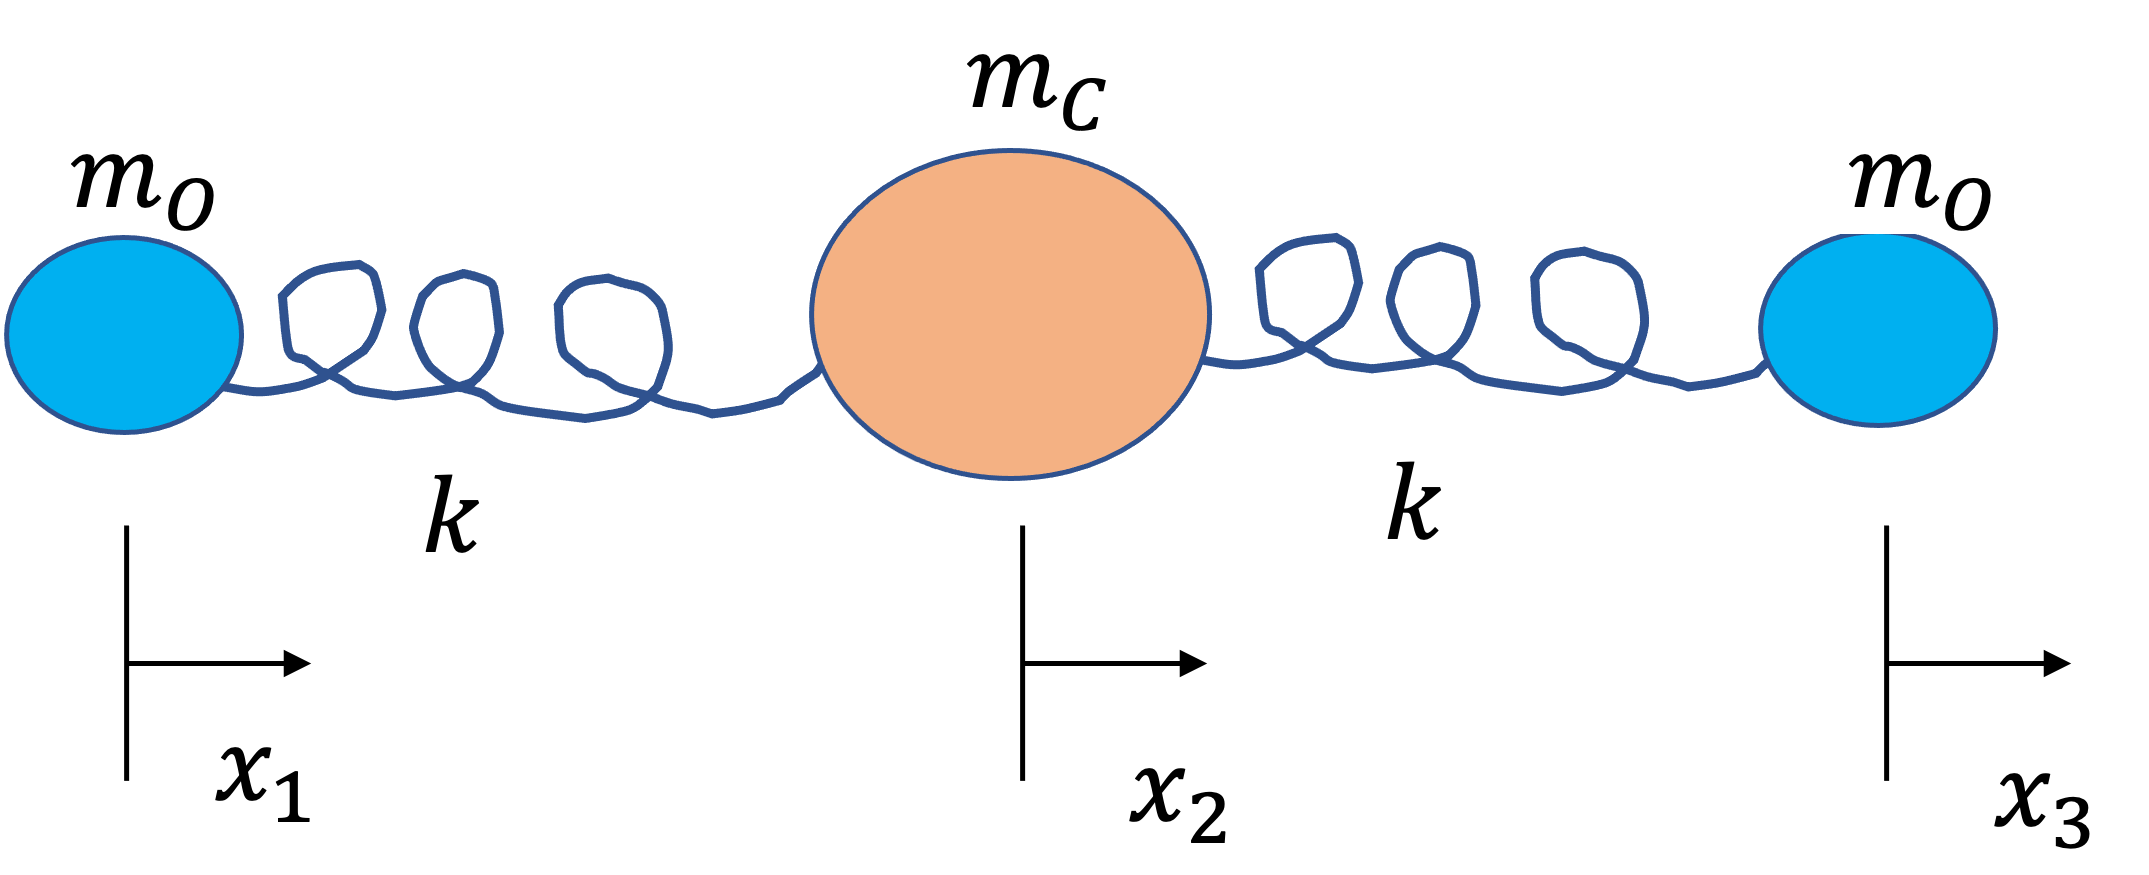
</div>

Following the example of the coupled oscillator we did in class, convince yourself that the equation of motion for this 3 mass and 2 spring system in given as:

$$a_1 = -\frac{k}{m_O}x_1 + \frac{k}{m_O}x_2$$
$$a_2 = \frac{k}{m_C}x_1 -2\frac{k}{m_C}x_2 + \frac{k}{m_C}x_3$$
$$a_3 = \frac{k}{m_O}x_2 - \frac{k}{m_O}x_3$$

leading to the matrix equation:
$$
({\bf{K}}-\omega^2{\bf{I_3}}){\bf{A}} = 0,
$$

where
$$
{\bf{K}} = 
\begin{pmatrix}
\frac{k}{m_O}  & -\frac{k}{m_O} & 0\\
-\frac{k}{m_C} & 2\frac{k}{m_C} & -\frac{k}{m_C}\\
0              & -\frac{k}{m_O} & \frac{k}{m_O}
\end{pmatrix},\;\;
{\bf{I_3}} = 
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix},\;\;
{\bf{A}} = 
\begin{pmatrix}
A_1\\
A_2\\
A_3
\end{pmatrix}
$$


# Problem 1
Define the ${\bf{K}}$ matrix in python using the numpy library. Assume for now that 
$$k = 1\;N/m,\;\;m_p = 1\;kg, \;\; m_C = 12m_p,\;\; m_O = 16m_p$$,
where $k$ is the spring constant (e.g. the strength of the bonds), $m_p$ is the proton mass, $m_C$ is the carbon mass (containing 12 protons), and $m_O$ is the oxygen mass (containing 16 protons). # Problem 1 
Define the ${\bf{K}}$ matrix in python using the numpy library. Assume that $k = m_O = 1$ and $m_C = \frac{3}{4}m_O$.

In [11]:
#import packages
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [34]:
k = 1 # N/m
m_p = 1 # kg
m_o = 16 * m_p
m_c = .75 * m_o

In [35]:
K = np.array([[k/m_o, -k/m_o, 0], [-k/m_c, 2*k/m_c, -k/m_c], [0, -k/m_o, k/m_o]])

# Problem 2 
Use the numpy linear algebra library to solve for the eigenvalues and eigenvectors.
Note that this problem can be solved analytically, in which case you will find one of the eigenvalues being $0$. When evaluating this numerically with Numpy, you will not get a value of $0$, but rather a very small number (e.g. $\sim10^{-18}$). This discrepency is due to the precision that Numpy is using to solve for the eigenvalues. It is important to remember that numerical solutions are approximate and you will need to assess what level of precision is needed for your particular problem. In our case the Numpy precision will be enough.

In [36]:
vals, vecs = np.linalg.eig(K)
print(vals)
print(vecs)

[ 2.29166667e-01  6.25000000e-02 -7.16390034e-18]
[[ 3.31294578e-01  7.07106781e-01  5.77350269e-01]
 [-8.83452209e-01 -2.47434564e-16  5.77350269e-01]
 [ 3.31294578e-01 -7.07106781e-01  5.77350269e-01]]


# Problem 3 
Plot of $x(t)$ vs. $t$ for the three masses for each of the three eigenvalues. You should be plotting each equation of
$$ {\bf{x_i}}(t) = {\bf{v_i}}\cos(\omega_i t),$$

where $i$ is the $i^{th}$ eigenvalue and ${\bf{v_i}}$ is the eignevector assosiated with the $i^{th}$ eignevalue, $\omega_i$, calculated by Numpy. 

For the time, create an array that has $100$ time points and spans from $0\;s$ to $100\;s$. 

### 3A) Eigenvalue 1:

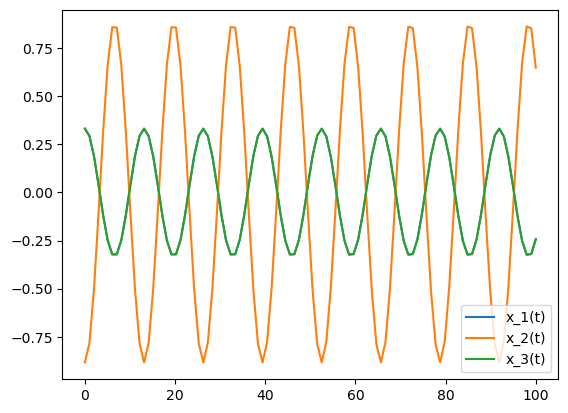

In [38]:
#eigenvalue 1
t = np.linspace(0, 100, num=100)

eigv = vals[0]

v = vecs[:, 0]

x = []

for t0 in t:
    x.append(v*(mt.cos(mt.sqrt(eigv)*t0)))
    
x = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x_1(t)')
ax.plot(t, x[:, 1], label='x_2(t)')
ax.plot(t, x[:, 2], label='x_3(t)')
ax.legend()

One of the plots should look like (note $x_1$ and $x_3$ vs. $t$ are idendical):

<div>
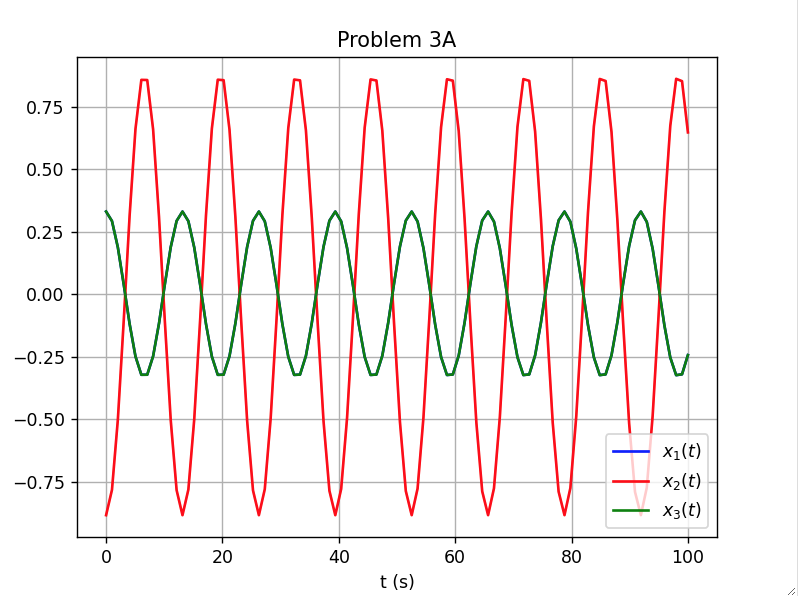
</div>


### 3B) Eigenvalue 2:

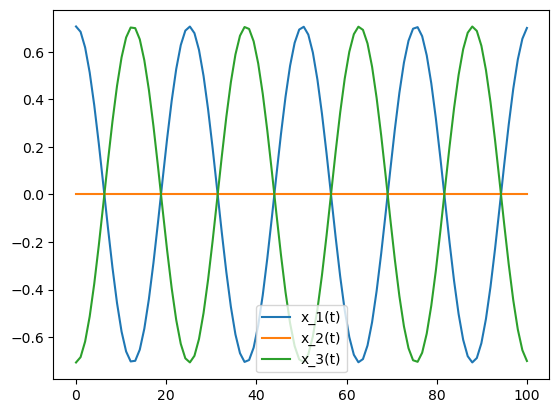

In [39]:
#eigenvalue 2
t = np.linspace(0, 100, num=100)

eigv = vals[1]

v = vecs[:, 1]

x = []

for t0 in t:
    x.append(v*(mt.cos(mt.sqrt(eigv)*t0)))
    
x = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x_1(t)')
ax.plot(t, x[:, 1], label='x_2(t)')
ax.plot(t, x[:, 2], label='x_3(t)')
ax.legend()

One of the plots should look like:

<div>
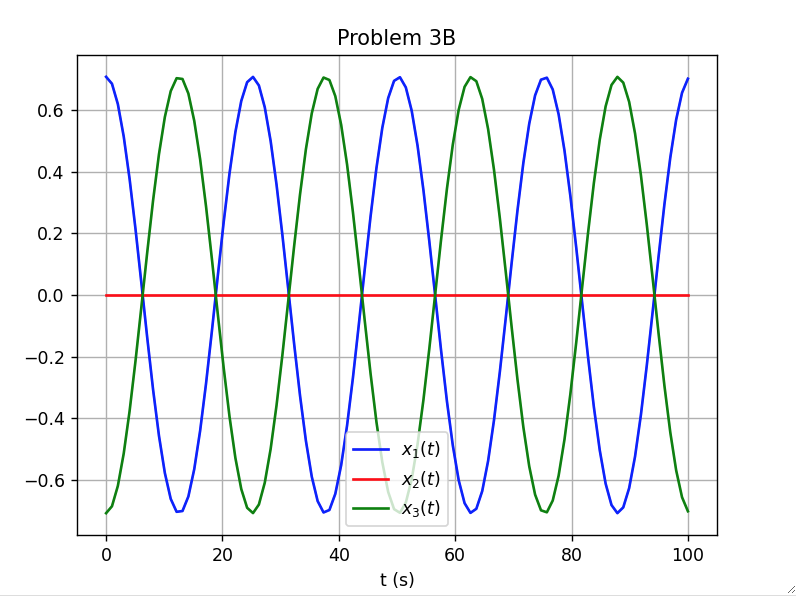
</div>

### 3C) Eigenvalue 3:

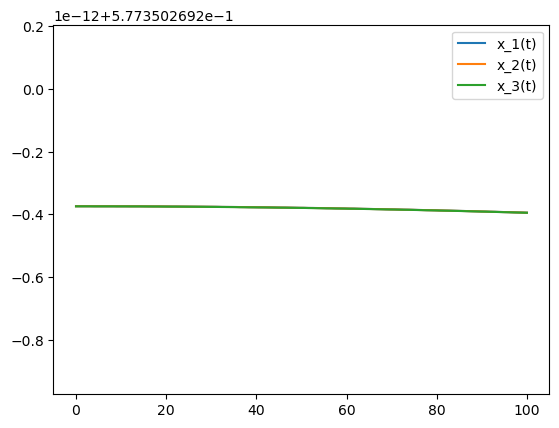

In [43]:
#eigenvalue 3
t = np.linspace(0, 100, num=100)

eigv = vals[2]

v = vecs[:, 2]

x = []

for t0 in t:
    x.append(v*(mt.cos(mt.sqrt(np.abs(eigv))*t0)))
    
x = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x_1(t)')
ax.plot(t, x[:, 1], label='x_2(t)')
ax.plot(t, x[:, 2], label='x_3(t)')
ax.legend()

One of the plots should look like (note $x_1,\; x_2,\; x_3$ vs. $t$ are identical:

<div>
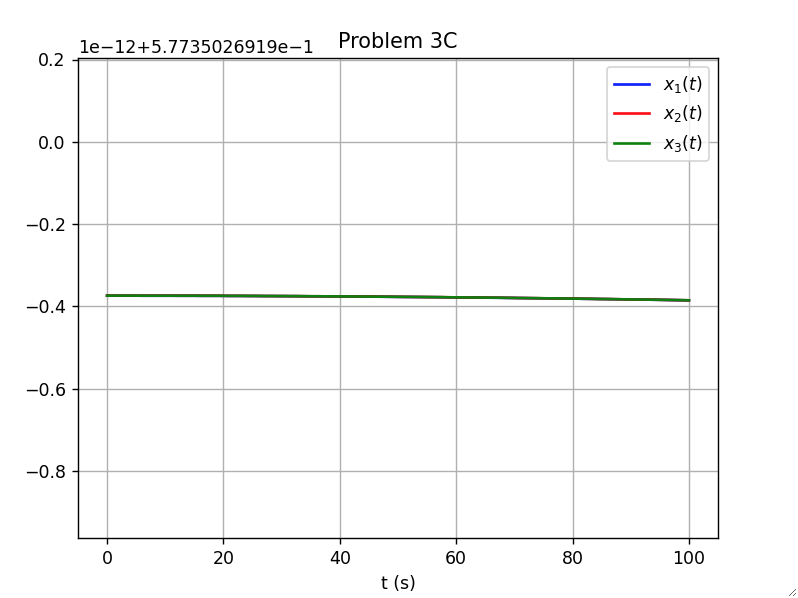
</div>


# Problem 4

We can match the 3 normal modes plotted in Problem 3A) - 3C) the molecule motions shown below. 

### Problem 4A)
Which egienvalue from Problem 3A, 3B, or 3C matches the motion shown below, where there are no oscillations?


<div>
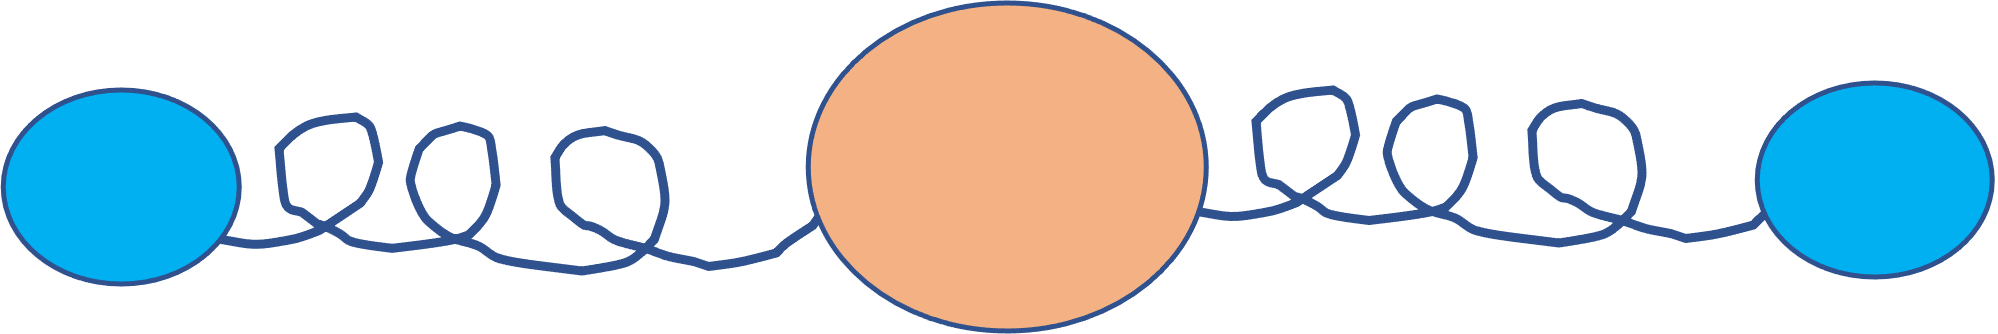
</div>



Type the problem number (3A, 3b, or 3C) that behaves like the image shown above:

    Problem 3C

### Problem 4B)
Which egienvalue from Problem 3A, 3B, or 3C matches the motion shown below, where the two O atoms oscillate exactly out of phase with each other? 

<div>
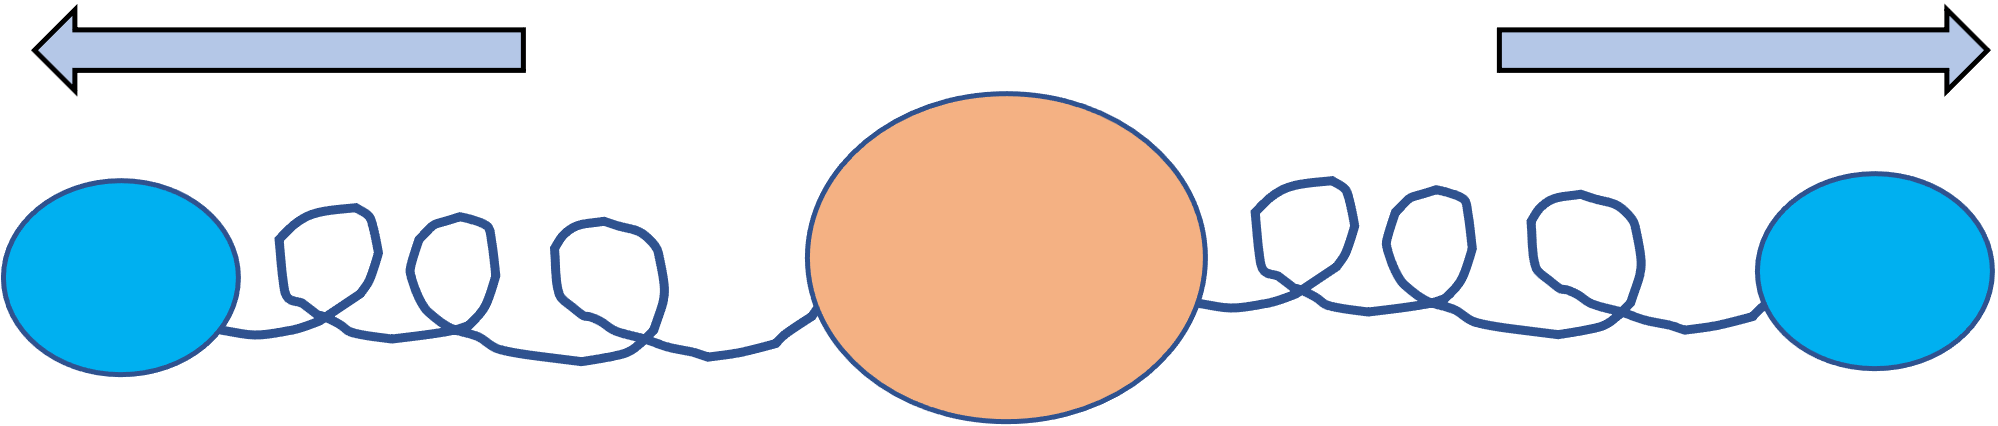
</div>


Type the problem number (3A, 3b, or 3C) that behaves like the image shown above:

In [23]:
    Problem 3B

SyntaxError: invalid syntax (3552138063.py, line 1)

### Problem 4C)
Which egienvalue from Problem 3A, 3B, or 3C matches the motion shown below, where the two O atoms oscillate in phase with each other, but the C atom is out of phase with the O atoms? 

<div>
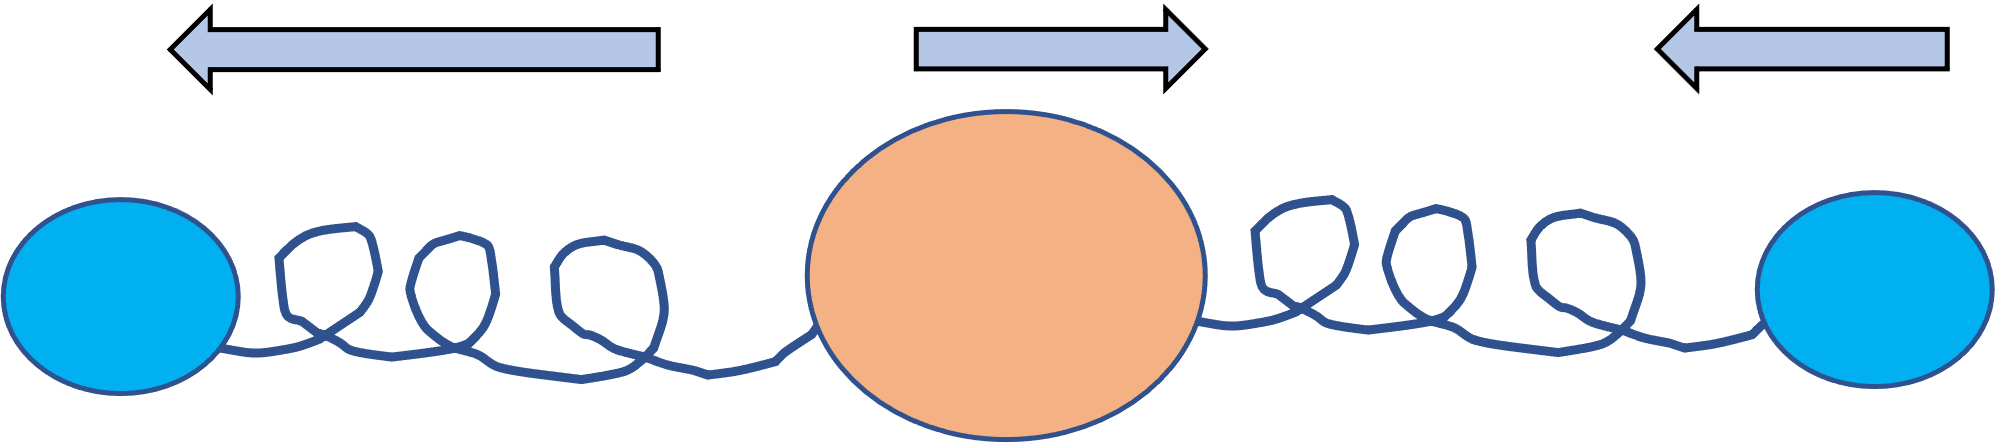
</div>

Type the problem number (3A, 3b, or 3C) that behaves like the image shown above:

    Problem 3A

# Problem 5

From the problems above we are able to get an understanding of a CO$_2$ molecule linear vibration behavior. However if we really want to try and model a CO$_2$ molecule we will need to use more realistic values for the various quantities. Using quantities below recalulate the eigenvalues and eigenvectors of the CO$_2$ molecule.

$$ k = 1400\; N/m,\;\; m_p = 1.67\times10^{-27}\; kg, \;\; m_C = 12m_p, \;\; m_O = 16m_p$$

In practice, $k$ can be extracted from the potential energy curve of the CO$_2$ molecule.

In [44]:
k = 1400 # N/m
m_p = 1.67E-27 # kg
m_o = 16 * m_p
m_c = 12 * m_p

In [49]:
K_r = np.array([[k/m_o, -k/m_o, 0], [-k/m_c, 2*k/m_c, -k/m_c], [0, -k/m_o, k/m_o]])
vals_r, vecs_r = np.linalg.eig(K_2)

# Problem 6

For these new eigenvalues, note that the smallest of the three, corresponds to the one that is analytically zero and found to be $\sim10^{-18}$ in Problem 2. We will ignore this value for the rest of this problem set.

Plot $x(t)$ vs. $t$ for the three masses for the **largest** of three eigenvalues. 

For the time, create an array that has $100$ time points and spans from $0\;s$ to $0.5\;s$.

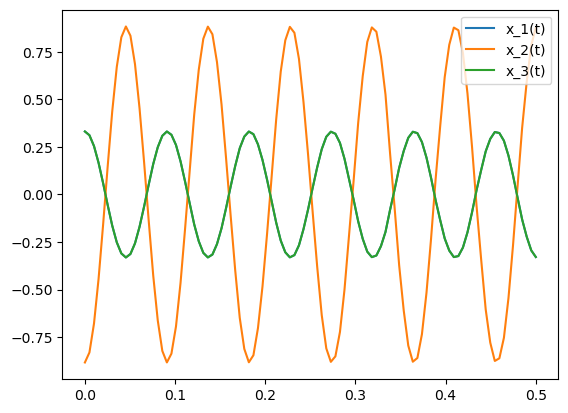

In [51]:
#eigenvalue 1

t = np.linspace(0, 0.5, num=100)

eigv = vals_r[0]

v = vecs_r[:, 0]

x = []

for t0 in t:
    x.append(v*(mt.cos(mt.sqrt(eigv)*t0)))
    
x = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x_1(t)')
ax.plot(t, x[:, 1], label='x_2(t)')
ax.plot(t, x[:, 2], label='x_3(t)')
ax.legend()

Your plot for Problem 6 should look like:

<div>
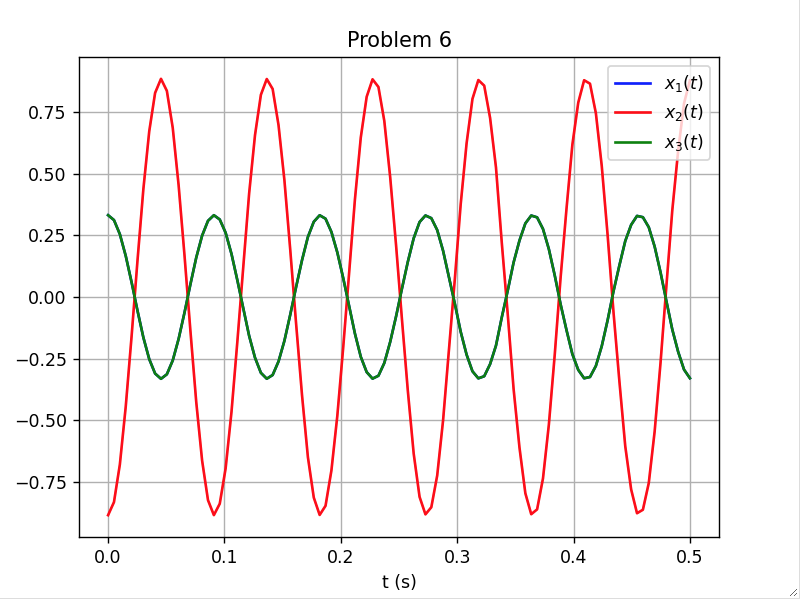
</div>

# Problem 7

Plot $x(t)$ vs. $t$ for the three masses for the eigenvalue that falls **between** the largest and smallest of the three eigenvalues.

For the time, create an array that has $100$ time points and spans from $0\;s$ to $0.1\;s$. 
You will notice that there are oscillations contained within a larger oscilation envolope. These types of patterns are known as [beats](https://en.wikipedia.org/wiki/Beat_(acoustics)).

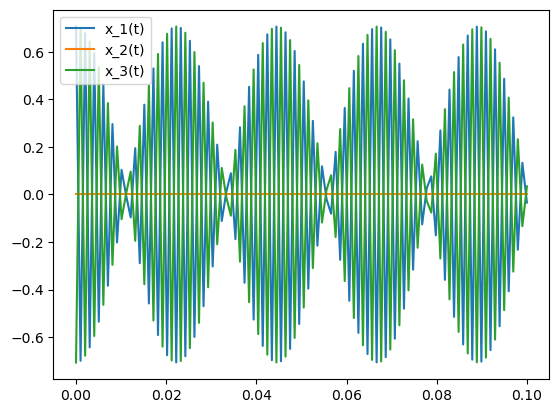

In [53]:
t = np.linspace(0, 0.1, num=100)

eigv = vals_r[1]

v = vecs_r[:, 1]

x = []

for t0 in t:
    x.append(v*(mt.cos(mt.sqrt(eigv)*t0)))
    
x = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x_1(t)')
ax.plot(t, x[:, 1], label='x_2(t)')
ax.plot(t, x[:, 2], label='x_3(t)')
ax.legend()

Your plot for Problem 7 should look like:
<div>
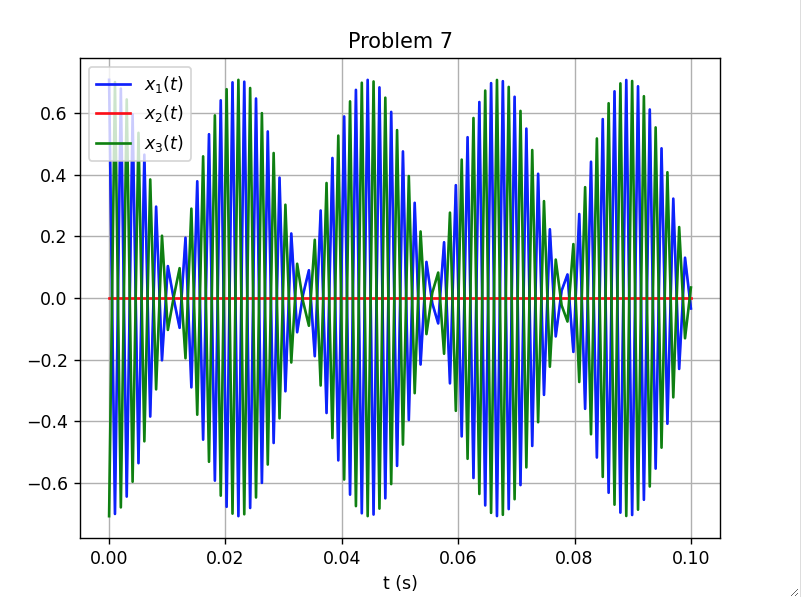
</div>

# Problem 8

When molecules vibrate they can change their net electric dipole moment (see 1062 notes). At particular vibration frequencies, the dipole moment is changed such that there is a strong interaction between light and matter, resulting in the molecule absorbing that light. This is the case with one of the linear frequency modes of CO$_2$. Below shows the infrared (IR) absorption spectrum of CO$_2$, taken from the [NIST web page](https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Type=IR-SPEC&Index=1). The vertical axis shows the amount of absroption, and the horizontal axis shows the wavelength. The spikes show the amount of light absorbed by CO$_2$ and at what wavelength it was absorbed.

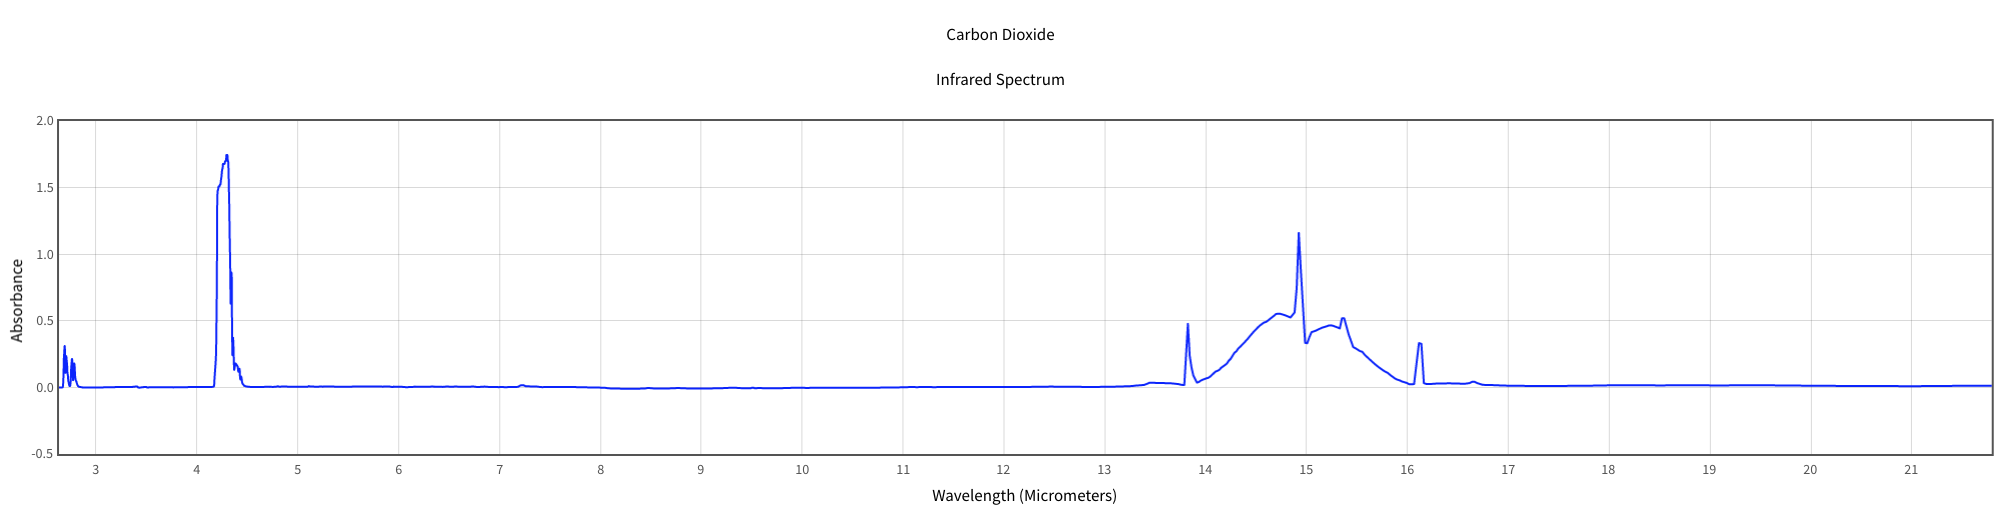

Let's use our model and see if it reproduces any of the absorption frequencies. Our eigenvalues we calculated are the normal frequencies for our CO$_2$ model, so to compare to the plot above we need to first convert them into wavelengths. This can be done using the relation (see 1062):

$$\lambda = 2\pi\frac{c}{\omega},$$

where $\lambda$ is the wavelength, $c$ is the speed of light, and $\omega$ is the angular frequency (e.g. our eigenvalues).

Using $c = 3\times10^8\; m/s$ as the speed of light calculate the wavelengths corresponding to the two largest eigenvalues from Problem 5. Note, that the eigenvalues returned by the solver in Problem 5, are the angular frequency squared (e.g. $\omega^2$), so don't forget to take its square root to obtain $\omega$ and make sure your calculation is in $\mu m$, for comparison to the IR plot.

In [56]:
c = 3.0E8
lambda1 = 10**6*(2*mt.pi*c/(mt.sqrt(vals_r[0])))
lambda2 = 10**6*(2*mt.pi*c/(mt.sqrt(vals_r[1])))

print(lambda1)
print(lambda2)

4.300506584210297
8.234843161615109


# Problem 9

Which eigenvalue corresponds to an absorption frequecy seen in the IR plot?

In [57]:
The first eigenvalue

SyntaxError: invalid syntax (1622403347.py, line 1)